Some visualizations to provide insight into writing engaging Medium articles. Code to create images for all of my Medium article reside here. 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [6]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

df = pd.concat([X_train, y_train], axis=1).append(pd.concat([X_test, y_test], axis=1))

In [8]:
list(df.columns)

['title',
 'subtitle',
 'tags',
 'author',
 'h1_headers',
 'h2_headers',
 'paragraphs',
 'blockquotes',
 'bold_text',
 'italic_text',
 'n_bullet_lists',
 'n_numbered_lists',
 'n_gists',
 'n_code_chunks',
 'n_vids',
 'n_links',
 'publication',
 'read_time',
 'date',
 'title_length',
 'subtitle_length',
 'n_tags',
 'n_h1_headers',
 'n_h2_headers',
 'n_paragraphs',
 'n_bold_text',
 'n_italic_text',
 'n_blockquotes',
 'n_pics',
 'article_length',
 'mean_paragraph_length',
 'year',
 'month',
 'day',
 'day_of_week',
 'season',
 'winter',
 'summer',
 'spring',
 'tag_Data_Science',
 'tag_Machine_Learning',
 'tag_Artificial_Intelligence',
 'tag_Python',
 'tag_Data',
 'tag_Data_Analysis',
 'tag_Data_Visualization',
 'tag_Deep_Learning',
 'tag_Big_Data',
 'tag_AI',
 'tag_Analytics',
 'tag_Technology',
 'tag_Statistics',
 'tag_Programming',
 'tag_R',
 'tag_NLP',
 'tag_Startup',
 'tag_Towards_Data_Science',
 'tag_Blockchain',
 'tag_Tech',
 'tag_Education',
 'tag_Neural_Networks',
 'tag_Marketing',


# Title case 

/Users/collindching/anaconda3/envs/metis/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


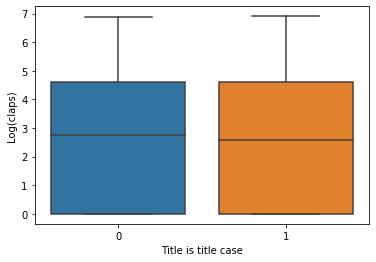

In [17]:
sns.boxplot(df['title_is_title_case'], np.log(df['n_claps']))
plt.ylabel('Log(claps)')
plt.xlabel('Title is title case')
plt.savefig('img/title_case_boxplot.png')

# How does read time affect claps?

Text(0.5, 0, 'Read time (minutes)')

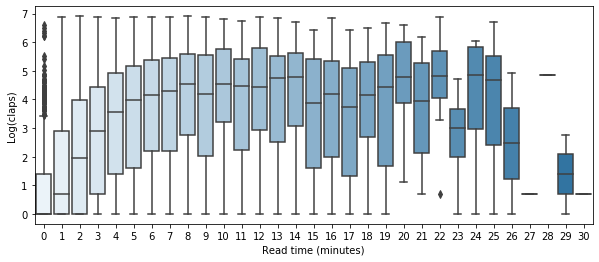

In [47]:
plt.figure(figsize=(10,4))
sns.boxplot(df['read_time'], np.log(df['n_claps']+1), palette=sns.light_palette("#1f77b4",30))
plt.xlim(-1, 30.5);
plt.xticks(list(range(31)), list(range(31)));
plt.ylabel('Log(claps)')
plt.xlabel('Read time (minutes)')
plt.savefig('img/read_time_boxplot.png')

Articles that have a read time between 8 and 25 minutes generally capture attention fairly well, then starts dipping for longer articles. People don't seem to be turned off by longer articles, as long as the quality is there.

# Effect of publication

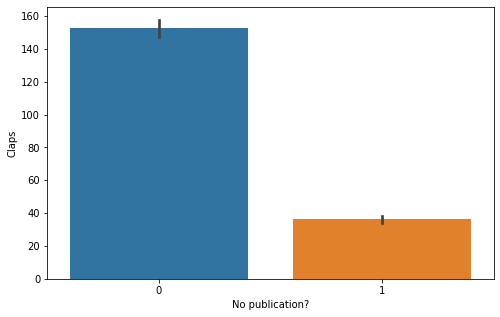

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(df['publication_None'],df['n_claps'])
plt.xlabel('No publication?')
plt.ylabel('Claps')

plt.savefig('img/no_pub_barplot.png')

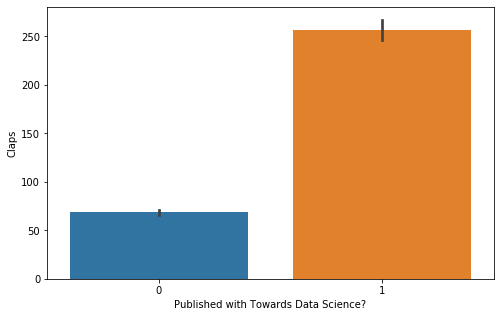

In [57]:
plt.figure(figsize=(8,5))

sns.barplot(df['publication_Towards_Data_Science'],df['n_claps'])
plt.xlabel('Published with Towards Data Science?')
plt.ylabel('Claps')

plt.savefig('img/pub_TDS_barplot.png')

Get the top publications.

In [63]:
Counter(df['publication']).most_common(5)

[('None', 6714),
 ('Towards Data Science', 1718),
 ('Data Driven Investor', 271),
 ('HackerNoon.com', 114),
 ('Analytics Vidhya', 51)]

In [67]:
top_pubs = [x[0] for x in Counter(df['publication']).most_common(5)]

In [69]:
len(df)

13126

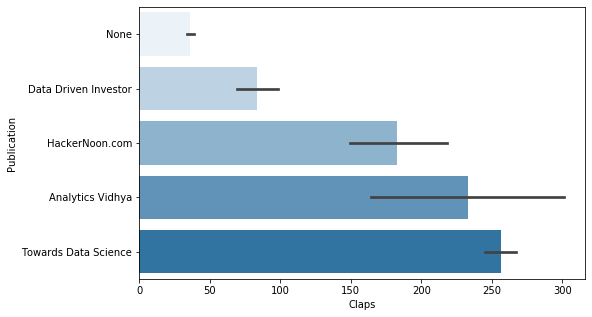

In [84]:
plt.figure(figsize=(8,5))

sns.barplot(y='publication',x='n_claps', data=df[df['publication'].isin(top_pubs)], 
            palette=sns.light_palette("#1f77b4",5),
            order=['None','Data Driven Investor','HackerNoon.com','Analytics Vidhya','Towards Data Science'])


plt.ylabel('Publication')
plt.xlabel('Claps')

plt.savefig('img/pub_comparison_barpot.png', bbox_inches='tight')

In [68]:
top_pubs

['None',
 'Towards Data Science',
 'Data Driven Investor',
 'HackerNoon.com',
 'Analytics Vidhya']

# Optimal number of pictures?

Change the color of according to the mean value. This will help visualize change.

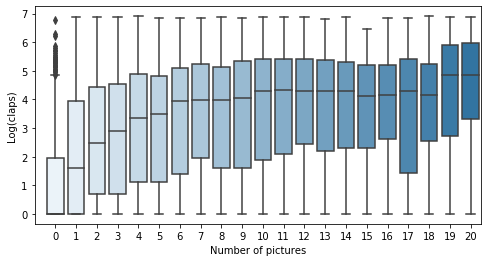

In [94]:
plt.figure(figsize=(8,4))
sns.boxplot(df['n_pics'], np.log(df['n_claps']+1), palette=sns.light_palette("#1f77b4",21));
plt.xlim(-1,20.5);
plt.xlabel('Number of pictures');
plt.xticks(list(range(21)), list(range(21)));
plt.ylabel('Log(claps)');

plt.savefig('img/pictures_boxplot.png')

Incorporating 6 claps seems to make sense for these articles. 

# Bolding and italics 

# Digits in title

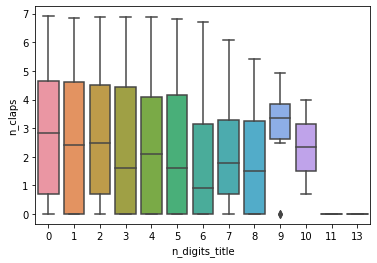

In [51]:
sns.boxplot(df['n_digits_title'], np.log(df['n_claps']+1))

In [2]:
import seaborn as sns

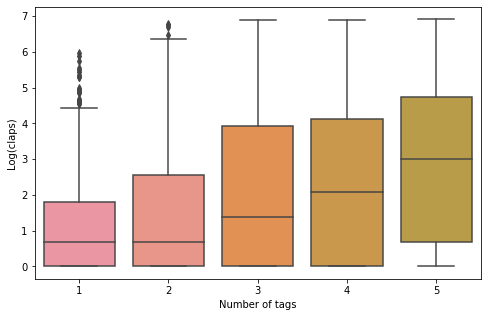

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(df['n_tags'], np.log(df['n_claps']+1))
plt.xlim(-.5,4.5)
plt.ylabel('Log(claps)')
plt.xlabel('Number of tags')
plt.savefig('img/tags_boxplot.png')